In [16]:
import numpy as np
import torch
import torch.optim as optim
torch.set_printoptions(edgeitems=2, linewidth=75)
from matplotlib import pyplot as plt

In [3]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0,
                    8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4])
#Normalizing (value between -1 - 1)
t_un = 0.1 * t_u

In [9]:
def model(t_u, w, b):
    return w * t_u + b

In [11]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()


In [12]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [13]:
#Linear Model with SGD
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate) # <1>

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params, # <1> 
    t_u = t_un,
    t_c = t_c)

Epoch 500, Loss 43.268959
Epoch 1000, Loss 29.849016
Epoch 1500, Loss 20.893354
Epoch 2000, Loss 14.916854
Epoch 2500, Loss 10.928510
Epoch 3000, Loss 8.266933
Epoch 3500, Loss 6.490756
Epoch 4000, Loss 5.305433
Epoch 4500, Loss 4.514429
Epoch 5000, Loss 3.986567


tensor([ 47.2819, -13.9237], requires_grad=True)

In [15]:
#Linear Model with Adam
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.Adam([params], lr=learning_rate) # <1>

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params, # <1> 
    t_u = t_un,
    t_c = t_c)

Epoch 500, Loss 77.498192
Epoch 1000, Loss 56.931812
Epoch 1500, Loss 52.246971
Epoch 2000, Loss 48.030857
Epoch 2500, Loss 43.178116
Epoch 3000, Loss 37.872379
Epoch 3500, Loss 32.371433
Epoch 4000, Loss 26.948797
Epoch 4500, Loss 21.853136
Epoch 5000, Loss 17.277388


tensor([30.1158, -4.8922], requires_grad=True)

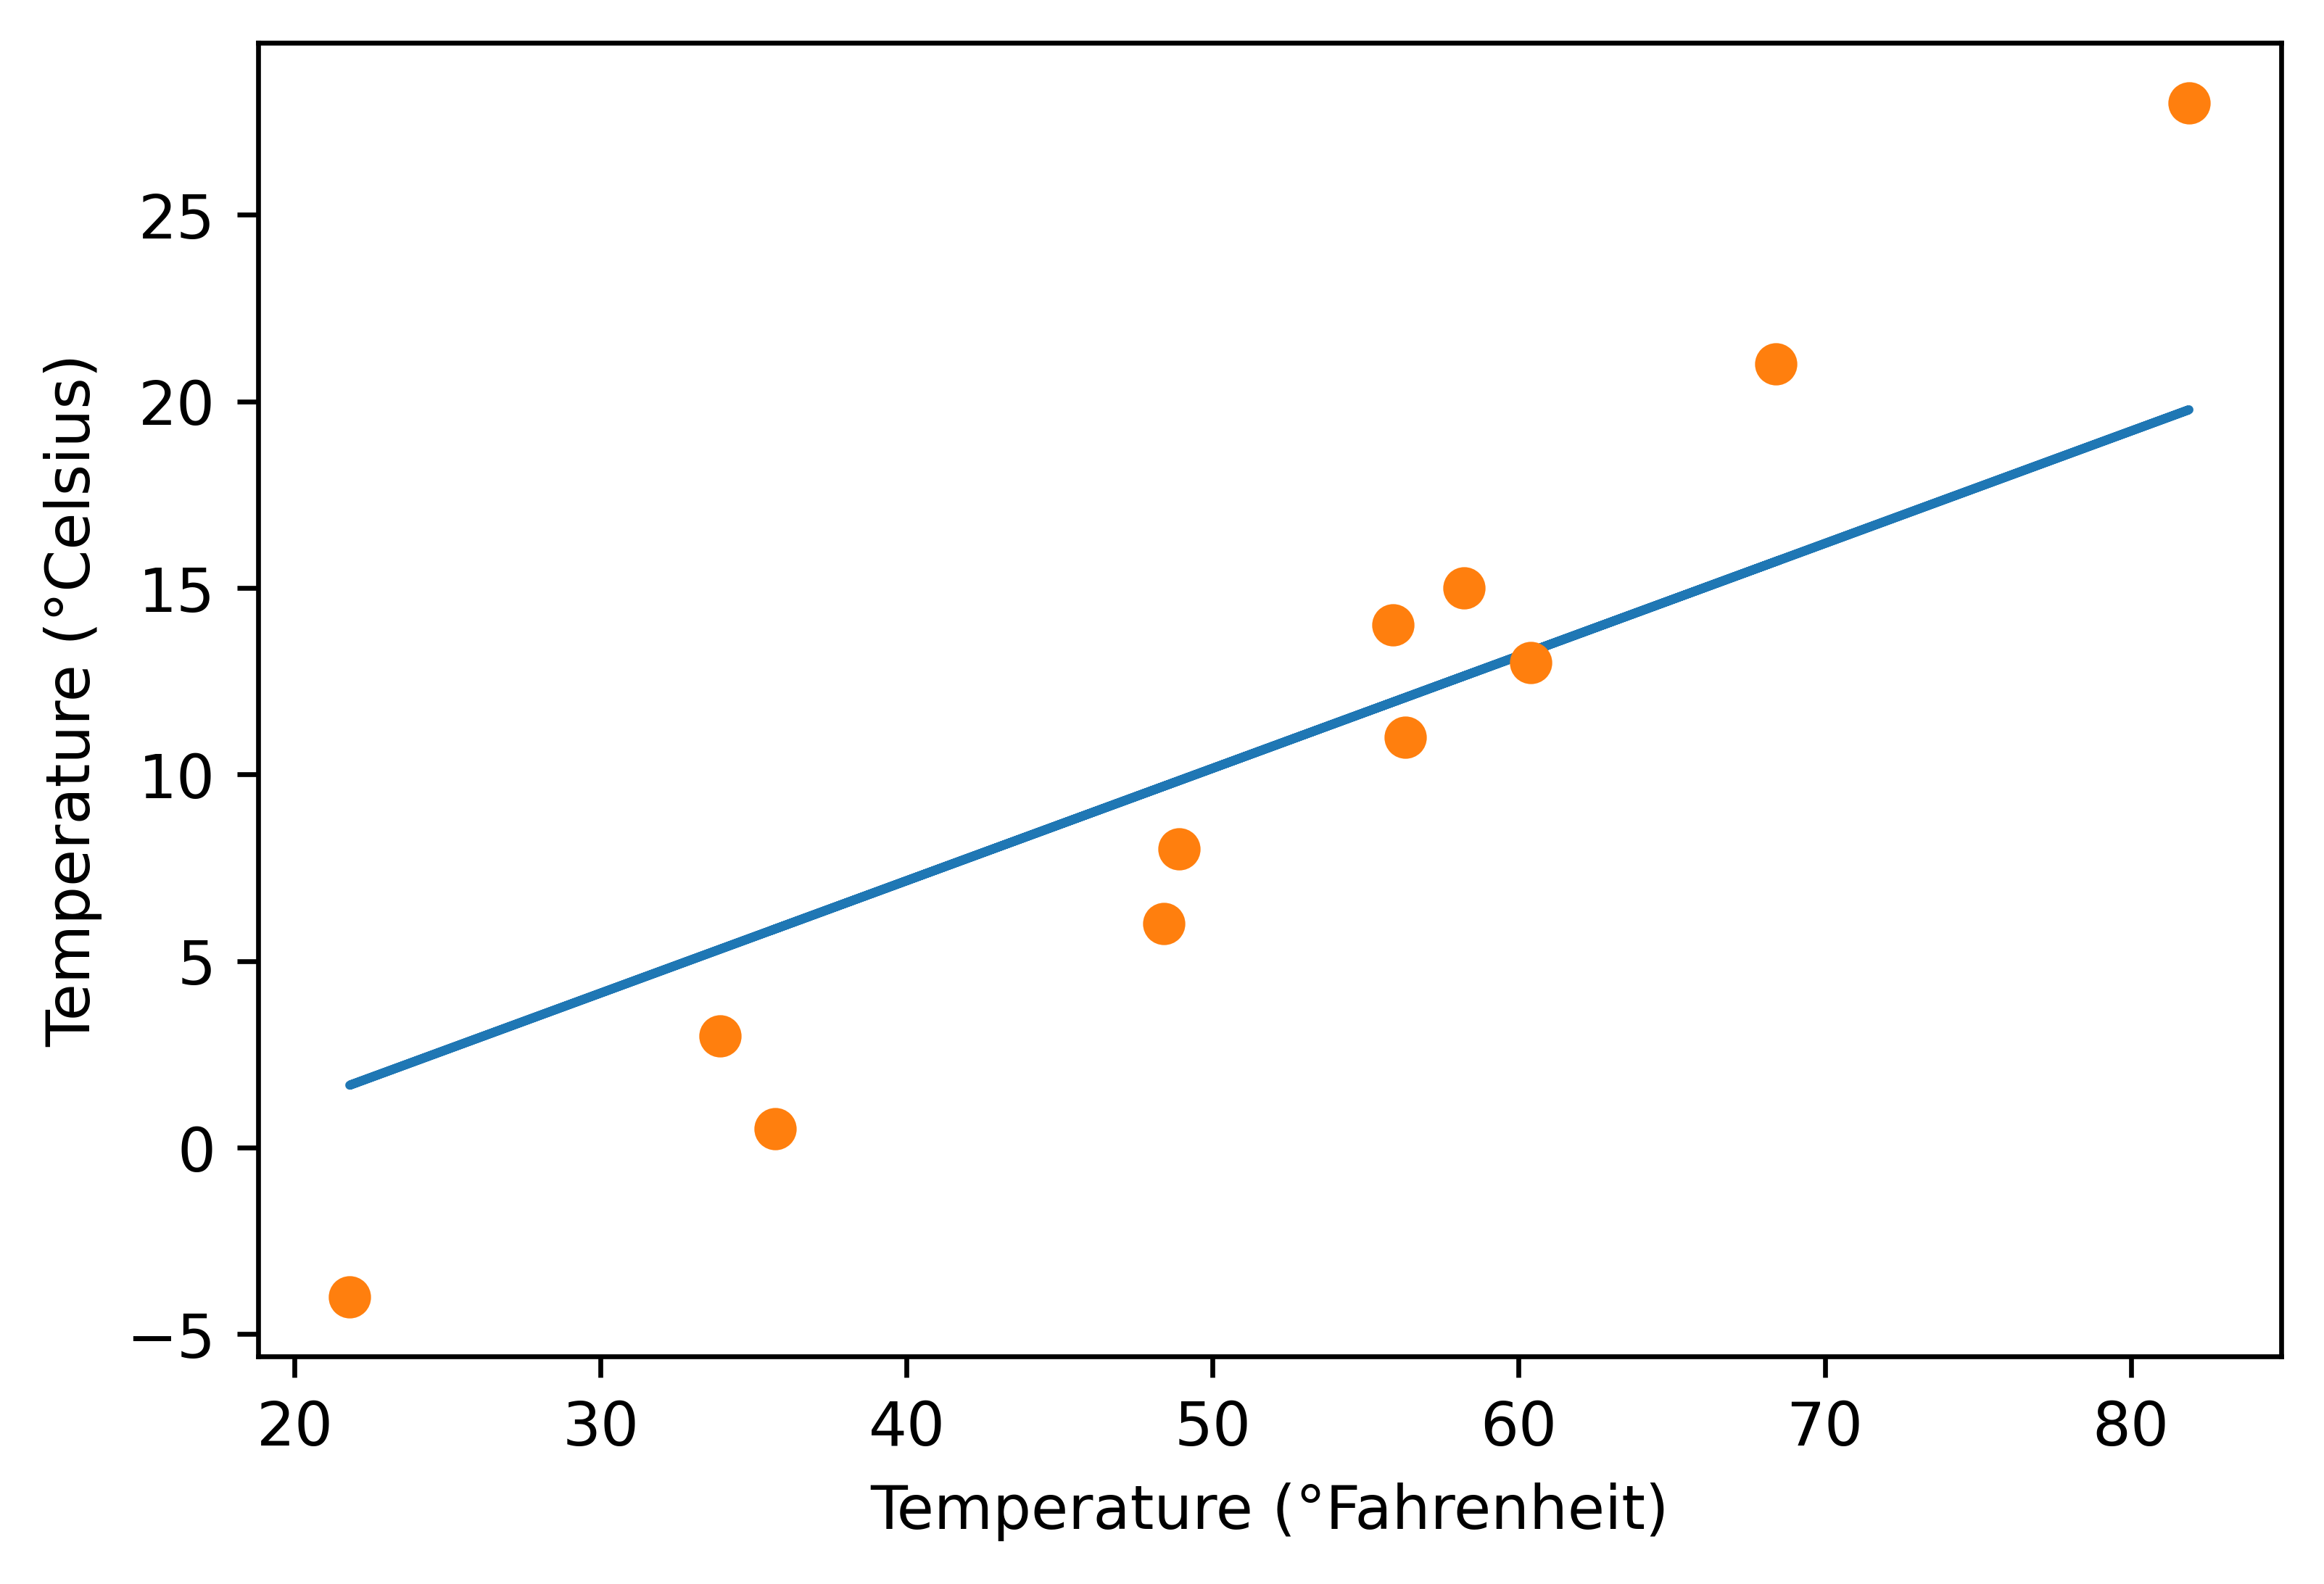

In [17]:
t_p = model(t_un, *params)  # <1>

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip